<a href="https://colab.research.google.com/github/Yashas7206988696/Random-Forest-Obesity-Tuner/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best params: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 300}
Best cross-val R²: 0.7969520529501135
Test R²: 0.976
Test RMSE: 1.769


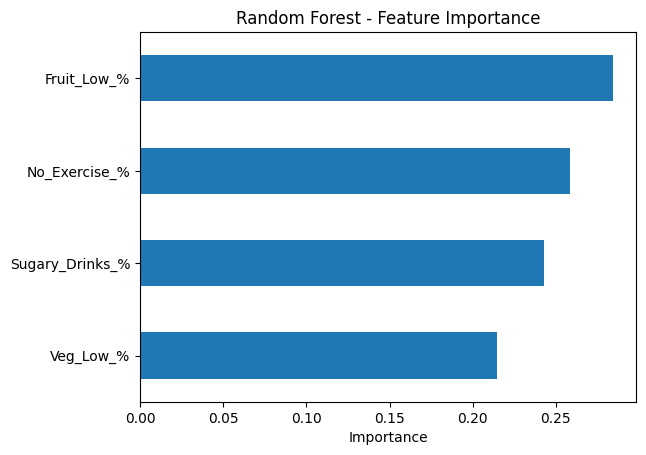

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Toy dataset (replace with your real pivoted CDC data)
data = {
    'Fruit_Low_%':  [40, 30, 20, 50, 60, 25, 35, 45, 55, 30],
    'Veg_Low_%':    [30, 20, 25, 40, 50, 20, 30, 35, 45, 25],
    'No_Exercise_%':[25, 15, 10, 35, 40, 10, 20, 30, 45, 15],
    'Sugary_Drinks_%':[20, 10, 15, 25, 30, 12, 18, 22, 28, 10],
    'Obesity_Rate_%':    [35, 25, 20, 45, 50, 22, 30, 38, 48, 23]
}
df = pd.DataFrame(data)

# Features & target
X = df.drop(columns=['Obesity_Rate_%'])
y = df['Obesity_Rate_%']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],                                                                    #n estimaters are 3
    'max_depth': [None, 5, 10],                                                                         #max depth is 2                                   #so this runs the algorithm for 3*2*3 times which is 18 times before the output is displayed
    'min_samples_leaf': [1, 2, 4]                                                                       #min samples leaf is 3
}
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X, y)  # Fit on full data for tuning

# Best params and score
print("Best params:", grid_search.best_params_)
print("Best cross-val R²:", grid_search.best_score_)

# Train final model with best params
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Predict & Evaluate on test set
y_pred = best_rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test R²: {r2:.3f}")
print(f"Test RMSE: {rmse:.3f}")

# Feature Importance
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title('Random Forest - Feature Importance')
plt.xlabel('Importance')
plt.show()
